<a href="https://colab.research.google.com/github/guptankit005/Analytics/blob/master/KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#importing data from sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

#converting data into pandas dataframe
canc_data = pd.DataFrame(data.data, columns=data.feature_names)

#adding target field to the dataset
canc_data['target'] = pd.Series(data.target)

In [ ]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
#printing first five rows of data
#canc_data.head()

#checking information about all the columns
#canc_data.info()

#checking basic statistical distribution of data
#canc_data.describe().transpose()

#checking for null values
#canc_data.isnull().sum()

#checking for duplicate rows
#canc_data.duplicated().sum()

#212 - Malignant, 357 - Benign
canc_data['target'].value_counts()
#value count to see if data is balanced or imbalanced.

1    357
0    212
Name: target, dtype: int64

In [ ]:
#creating X and y
X_feature = list(canc_data.columns)
X_feature.remove('target')

X = canc_data[X_feature]
y = canc_data['target']

In [ ]:
#splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        69
           1       0.95      0.95      0.95       102

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

Accuracy score on test:  0.942
Accuracy score on train:  0.94
log_loss :  2.019834865124315
AUC Score :  0.974


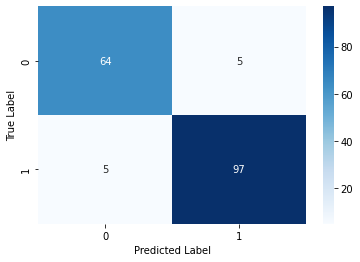

In [ ]:
#importing KNN from sklearn
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski').fit(X_train, y_train)

#predicting for our test data
y_pred = knn_clf.predict(X_test)
#generating classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#importing libraries to check model performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn import metrics

print("Accuracy score on test: " , round((knn_clf.score(X_test, y_test)),3))
print("Accuracy score on train: ", round((knn_clf.score(X_train, y_train)),3))

#printing log loss for the model
print('log_loss : ', log_loss(y_test, y_pred))



#let find ROC and AUC score
#before we calculate roc_auc_score(), we need to find out the predicted probabilityiies for test data.

pred_prob = pd.DataFrame(knn_clf.predict_proba(X_test))

#we'll also add the actual label

test_result = pd.DataFrame( { 'actual' : y_test})
test_result = test_result.reset_index()

test_result['prob_0'] = pred_prob.iloc[:,0:1]
test_result['prob_1'] = pred_prob.iloc[:,1:2]

#to calculate ROC AUC score we will pass actual class labels and predicted probability 

auc_score = round(metrics.roc_auc_score(test_result.actual, test_result.prob_1),3)
print("AUC Score : ",auc_score)


#generating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


In [ ]:
#hyperparameter tuning using grid search
from sklearn.model_selection import GridSearchCV

#we'll create a dictionary with possible hyperparameter values
param_val = [{'n_neighbors' : range(3,10),
              'metric' : ['euclidean', 'minkowski', 'canberra']}]

#grid search configuration
clfr = GridSearchCV(KNeighborsClassifier(), param_val, cv = 10, scoring = 'roc_auc')

#fitting into our data
clfr.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean', 'minkowski', 'canberra'],
                          'n_neighbors': range(3, 10)}],
             scoring='roc_auc')

In [ ]:
#we'll see for best score and parameters
print(clfr.best_score_)
print(clfr.best_params_)

0.9858739926739926
{'metric': 'canberra', 'n_neighbors': 7}


In [ ]:
#lets check all the combinations
clfr.cv_results_

{'mean_fit_time': array([0.00406649, 0.00365472, 0.00359654, 0.0038789 , 0.00370274,
        0.00362182, 0.00371985, 0.00399425, 0.00373008, 0.00438867,
        0.0055043 , 0.00373149, 0.0045934 , 0.00378399, 0.00367527,
        0.00247748, 0.0024529 , 0.00239704, 0.0024225 , 0.00238402,
        0.00283389]),
 'mean_score_time': array([0.0053416 , 0.00537777, 0.00539851, 0.00640018, 0.00620968,
        0.00559404, 0.00588219, 0.00569313, 0.00538583, 0.00606179,
        0.00666718, 0.00569806, 0.00561962, 0.00576029, 0.00709629,
        0.00451024, 0.00478625, 0.0045193 , 0.00455272, 0.00456131,
        0.00506332]),
 'mean_test_score': array([0.94185238, 0.95478938, 0.95270916, 0.95516007, 0.95734542,
        0.95967875, 0.95923407, 0.94185238, 0.95478938, 0.95270916,
        0.95516007, 0.95734542, 0.95967875, 0.95923407, 0.97233736,
        0.98173956, 0.98186081, 0.9820022 , 0.98587399, 0.98505092,
        0.98450549]),
 'param_metric': masked_array(data=['euclidean', 'euclidean', '

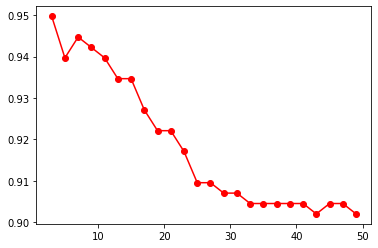

In [ ]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values

for i in range(3,50,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    train_acc = np.mean(neigh.predict(X_train) == y_train)
    test_acc = np.mean(neigh.predict(X_test) == y_test)
    acc.append([train_acc, test_acc])


import matplotlib.pyplot as plt # library to do visualizations 

# train accuracy plot 
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-")
plt.show()